In [119]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.graph_objs as go

In [120]:
azn = yf.Ticker("AZN.L")
hist = azn.history(period="1y")

print(hist.head())

                                   Open          High           Low  \
Date                                                                  
2023-09-26 00:00:00+01:00  10916.557447  11020.282357  10881.330119   
2023-09-27 00:00:00+01:00  10967.441366  11067.252128  10850.016940   
2023-09-28 00:00:00+01:00  10879.372492  10949.827144  10644.523653   
2023-09-29 00:00:00+01:00  10808.917758  10992.882681  10783.475801   
2023-10-02 00:00:00+01:00  10822.617569  10947.870286  10636.695568   

                                  Close   Volume  Dividends  Stock Splits  
Date                                                                       
2023-09-26 00:00:00+01:00  10924.385742  1606820        0.0           0.0  
2023-09-27 00:00:00+01:00  10879.373047  1501177        0.0           0.0  
2023-09-28 00:00:00+01:00  10769.776367  1491439        0.0           0.0  
2023-09-29 00:00:00+01:00  10863.715820  1752888        0.0           0.0  
2023-10-02 00:00:00+01:00  10714.978516  38163

In [121]:
df_azn = pd.DataFrame(hist)
df_azn_clean = df_azn.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
df_azn_clean.head()

,Close
Date,
2023-09-26 00:00:00+01:00,10924.385742
2023-09-27 00:00:00+01:00,10879.373047
2023-09-28 00:00:00+01:00,10769.776367
2023-09-29 00:00:00+01:00,10863.715820
2023-10-02 00:00:00+01:00,10714.978516


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Date', ylabel='Close'>

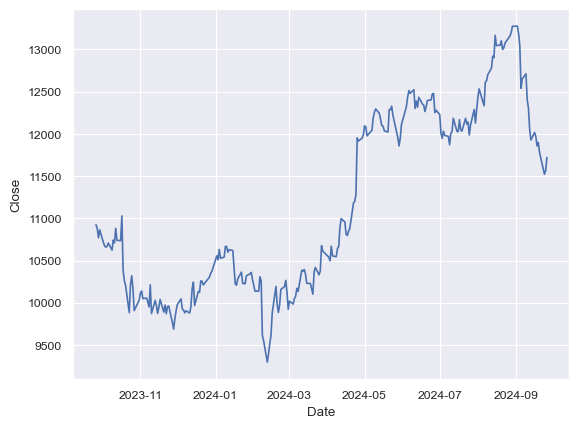

In [122]:
sns.set_theme("paper")
sns.lineplot(data=df_azn_clean, x="Date", y="Close")

In [123]:
def current_multiple_comparison(*tickers):
    tickers_array = []
    for ticker in tickers:
        tickers_array.append(ticker)    

    valuation_data = {}

    for ticker in tickers_array:
        stock = yf.Ticker(ticker)
        info = stock.info

        pe_ratio = info.get('forwardPE', None)
        pb_ratio = info.get('priceToBook', None) 
        eps = info.get('trailingEps', None) 
        ps_ratio = info.get('priceToSalesTrailing12Months', None)
        dividend_yield = (info.get('dividendYield', None))*100
    
        currency = info.get("currency")
        if currency == 'GBp':
            pe_ratio /= 100
            pb_ratio /= 100

        valuation_data[ticker] = {
            'P/E Ratio': pe_ratio,
            'P/B Ratio': pb_ratio,
            'EPS': eps,
            'P/S Ratio': ps_ratio,
            'Dividend Yield %': dividend_yield
        }

    for ticker, metrics in valuation_data.items():
        print(f"\nValuation metrics for {ticker}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")

In [124]:
current_multiple_comparison("AZN.L", "GSK.L", "SN.L")


Valuation metrics for AZN.L:
P/E Ratio: 16.210236
P/B Ratio: 4.5975208
EPS: 3.06
P/S Ratio: 3.6980035
Dividend Yield %: 2.02

Valuation metrics for GSK.L:
P/E Ratio: 9.059524
P/B Ratio: 4.320181600000001
EPS: 1.13
P/S Ratio: 1.9742345
Dividend Yield %: 3.9300002000000003

Valuation metrics for SN.L:
P/E Ratio: 13.311764
P/B Ratio: 1.8988084
EPS: 0.26
P/S Ratio: 1.7487372
Dividend Yield %: 2.6099999


In [125]:
def fetch_full_history(tickers):
    data = pd.DataFrame()

    for ticker in tickers:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="max")
        data[ticker] = hist['Close']
    
    return data

def plot_interactive_chart(data, tickers):
    fig = go.Figure()

    for ticker in tickers:
        fig.add_trace(go.Scatter(x=data.index, y=data[ticker], mode='lines', name=ticker))

    fig.update_layout(
        title="Stock Price Comparison (Full History)",
        xaxis_title="Date",
        yaxis_title="Price (Adjusted Close)",
        hovermode="x",
        xaxis_rangeslider_visible=True, 
        template="plotly_white"
    )

    fig.show()

tickers = ["AAPL", "MSFT", "GOOGL"]

data = fetch_full_history(tickers)

plot_interactive_chart(data, tickers)

In [126]:
df = yf.download(tickers='AAPL')

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

[*********************100%***********************]  1 of 1 completed


In [127]:
df_MSFT = yf.download(tickers='MSFT')
df_MSFT_LINKEDIN = df_MSFT.loc['2016-12-08':,:]
df_MSFT_LINKEDIN['change_tomorrow'] = df_MSFT_LINKEDIN.Close.pct_change(-1) * 100 * -1
df_MSFT_LINKEDIN = df_MSFT_LINKEDIN.dropna().copy()

[*********************100%***********************]  1 of 1 completed
/var/folders/33/_ft973790qv2wpzyrpc3p2fr0000gn/T/ipykernel_24362/4195951511.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date'>

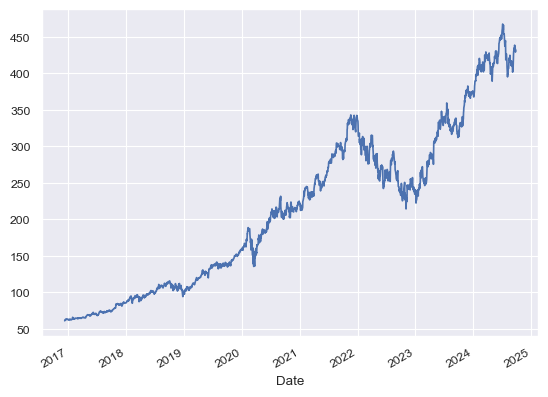

In [128]:
df_MSFT_LINKEDIN['change_tomorrow_direction'] = np.where(df_MSFT_LINKEDIN.change_tomorrow > 0, 'Up', 'Down')
df_MSFT_LINKEDIN.change_tomorrow_direction.value_counts()
df_MSFT_LINKEDIN.Close.plot()

In [129]:

#def get_stocks_in_sector(sector):
#director moves 
